# Finding food deserts in Brooklyn (NY)

In [1]:
### Importing GIS Libraries
import geopandas as gpd
import plotly.graph_objects as go

### Importing data preprocessing & visualization libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

### Importing warning library
import warnings
warnings.filterwarnings("ignore")

## Database 1: New York State Map

In [2]:
import os
### Storing New York Map coordinates of 2019 as a pandas dataframe
project_dir = r'C:\Users\ZK\Documents\Omdena'
ny_map = gpd.read_file(os.path.join(project_dir, 'Datasets\cb_2019_36_tract_500k\cb_2019_36_tract_500k.shp'),
                       encoding='utf-8')

In [3]:
### Checking how the dataframe looks like
ny_map.head(2)

,STATEFP,COUNTYFP,TRACTCE,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry
0,36,071,000502,1400000US36071000502,36071000502,5.02,CT,967431,969216,"POLYGON ((-74.02226 41.49281, -74.02180 41.496..."
1,36,103,135208,1400000US36103135208,36103135208,1352.08,CT,2287077,0,"POLYGON ((-73.28263 40.83063, -73.28157 40.832..."


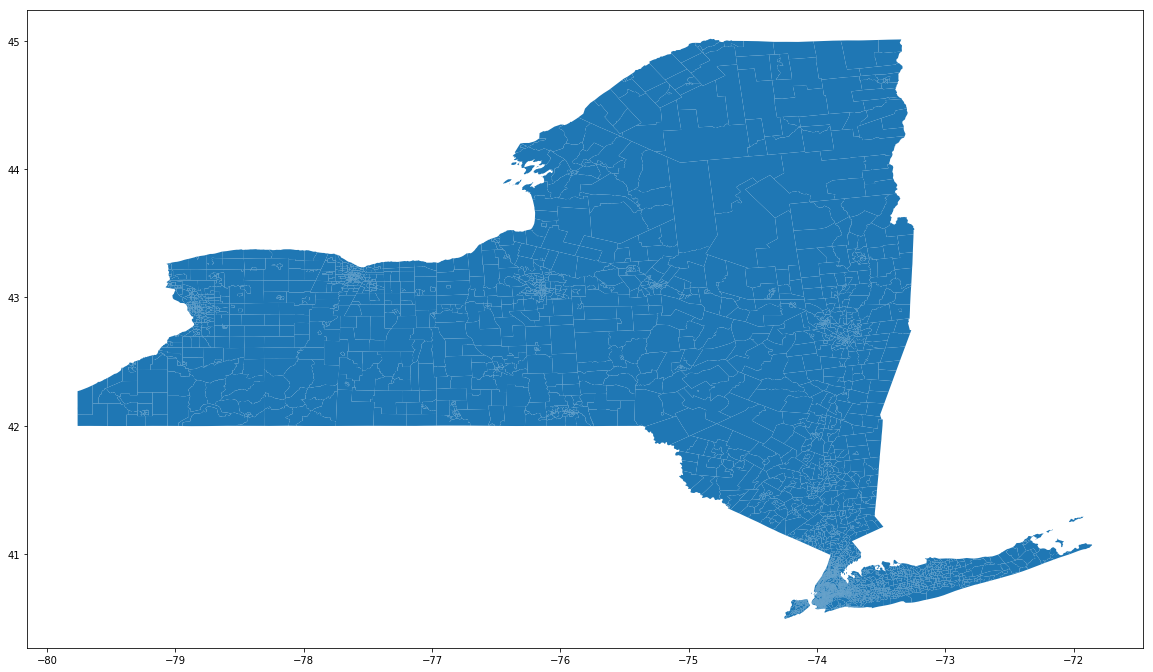

In [4]:
### Plotting the map of New York state

fig, ax = plt.subplots(figsize=(20,20))
ny_map.plot(ax=ax)
plt.show()

In [5]:
### Checking if all New York Counties are present in the dataframe
print("The total number of counties present in New York is", ny_map['COUNTYFP'].nunique())
print("Showing all county codes")
ny_map["COUNTYFP"].unique()

The total number of counties present in New York is 62
Showing all county codes


array(['071', '103', '047', '055', '005', '029', '061', '119', '033',
       '001', '085', '069', '067', '081', '007', '107', '051', '059',
       '073', '015', '063', '053', '065', '083', '027', '117', '009',
       '057', '037', '093', '021', '087', '121', '111', '105', '043',
       '019', '109', '023', '011', '113', '091', '035', '013', '099',
       '075', '039', '089', '045', '101', '095', '003', '025', '049',
       '097', '115', '017', '031', '077', '079', '123', '041'],
      dtype=object)

In [6]:
## Select "Kings County" which is code - 047 (Brooklyn Borough)
kings_map = ny_map[ny_map["COUNTYFP"]=="047"]
kings_map.head(5)

,STATEFP,COUNTYFP,TRACTCE,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry
2,36,047,057800,1400000US36047057800,36047057800,578,CT,172233,0,"POLYGON ((-73.95398 40.60140, -73.95304 40.601..."
3,36,047,058900,1400000US36047058900,36047058900,589,CT,424025,38353,"POLYGON ((-73.94605 40.72926, -73.94419 40.729..."
18,36,047,037000,1400000US36047037000,36047037000,370,CT,336242,0,"POLYGON ((-73.96615 40.58667, -73.96564 40.588..."
19,36,047,019900,1400000US36047019900,36047019900,199,CT,188914,0,"POLYGON ((-73.96949 40.68629, -73.96749 40.686..."
26,36,047,040000,1400000US36047040000,36047040000,400,CT,192000,0,"POLYGON ((-73.98078 40.59845, -73.97986 40.598..."


## Database 2: Food Access Research Atlas 2019 - Kings County

In [7]:
### Reading the Food Access Research Atlas of 2019
kings_foodaccess = pd.read_csv(os.path.join(project_dir, 'Datasets\Kings_data.csv'))
kings_foodaccess.head(2)

,CensusTract,Track Code,State,County,Urban,Pop2010,OHU2010,GroupQuartersFlag,NUMGQTRS,PCTGQTRS,...,TractSeniors,TractWhite,TractBlack,TractAsian,TractNHOPI,TractAIAN,TractOMultir,TractHispanic,TractHUNV,TractSNAP
0,36047000100,100,New York,Kings County,1,4338,2227,0,424,9.77,...,843,3396,427,330,0,15,170,347,1417,126
1,36047000200,200,New York,Kings County,1,1470,360,0,39,2.65,...,70,530,103,49,0,16,772,1277,265,138


In [8]:
### Imputing leading zeroes which usually gets removed when reading a csv file
kings_foodaccess['Track Code'] = kings_foodaccess['Track Code'].astype(str)
kings_foodaccess['Track Code'] = kings_foodaccess['Track Code'].str.zfill(6)

In [9]:
kings_foodaccess.head(2)

,CensusTract,Track Code,State,County,Urban,Pop2010,OHU2010,GroupQuartersFlag,NUMGQTRS,PCTGQTRS,...,TractSeniors,TractWhite,TractBlack,TractAsian,TractNHOPI,TractAIAN,TractOMultir,TractHispanic,TractHUNV,TractSNAP
0,36047000100,000100,New York,Kings County,1,4338,2227,0,424,9.77,...,843,3396,427,330,0,15,170,347,1417,126
1,36047000200,000200,New York,Kings County,1,1470,360,0,39,2.65,...,70,530,103,49,0,16,772,1277,265,138


In [10]:
### TRACTCE will be the primary key to link all the database.
## Renaming Tract Code as "TRACTCE"

kings_foodaccess = kings_foodaccess.rename(columns={'Track Code': 'TRACTCE'})
kings_foodaccess.head(2)

,CensusTract,TRACTCE,State,County,Urban,Pop2010,OHU2010,GroupQuartersFlag,NUMGQTRS,PCTGQTRS,...,TractSeniors,TractWhite,TractBlack,TractAsian,TractNHOPI,TractAIAN,TractOMultir,TractHispanic,TractHUNV,TractSNAP
0,36047000100,000100,New York,Kings County,1,4338,2227,0,424,9.77,...,843,3396,427,330,0,15,170,347,1417,126
1,36047000200,000200,New York,Kings County,1,1470,360,0,39,2.65,...,70,530,103,49,0,16,772,1277,265,138


In [11]:
first_compiled = kings_map.merge(kings_foodaccess, on='TRACTCE')
first_compiled['TRACTCE'].nunique()

754

## Database 3: Grocery Store 2003 - 2017

In [12]:
grocery_data = pd.read_csv(os.path.join(project_dir, 'Datasets\\nanda_grocery_tract.csv'))
#grocery_data.head(2)

grocery_data['tract_fips10'] = grocery_data['tract_fips10'].astype(str)
grocery_data['tract_fips10'] = grocery_data['tract_fips10'].str.zfill(11)

In [13]:
grocery_data['State_Code'] = grocery_data['tract_fips10'].str[:2]
grocery_data['County_Code'] = grocery_data['tract_fips10'].str[2:5]
grocery_data['Census_Tract_Code'] = grocery_data['tract_fips10'].str[-6:]

### Selecting New York State (State Code = 36)
grocery_ny = grocery_data[grocery_data["State_Code"]=="36"]

### Selecting Kings County (county code = 047)
grocery_kings = grocery_ny[grocery_ny['County_Code'] == '047']

grocery_kings = grocery_kings.rename(columns={'Census_Tract_Code': 'TRACTCE'})

### Selecting only 2017 data
grocery_kings_17 = grocery_kings[grocery_kings['year'] == 2017]

### Map TRACTCE in first_compiled and TRACTCE in grocery database for a single database
second_compiled = first_compiled.merge(grocery_kings_17, on='TRACTCE')

## Database 4: Socio-Economic Data

In [14]:
socio = pd.read_csv(os.path.join(project_dir, 'Datasets\\nanda_socio_eco_data.csv'))

In [15]:
socio['TRACT_FIPS20'] = socio['TRACT_FIPS20'].astype(str)
socio['TRACT_FIPS20'] = socio['TRACT_FIPS20'].str.zfill(11)

# Extracting portions
socio['State_Code'] = socio['TRACT_FIPS20'].str[:2]
socio['County_Code'] = socio['TRACT_FIPS20'].str[2:5]
socio['Census_Tract_Code'] = socio['TRACT_FIPS20'].str[-6:]

### Selecting New York State (State Code = 36)
socio_ny = socio[socio["State_Code"]=="36"]
### Selecting Kings County (county code = 047)
socio_kings = socio_ny[socio_ny['County_Code'] == '047']

# Rename columns
socio_kings = socio_kings.rename(columns={'Census_Tract_Code': 'TRACTCE'})

# Compile
third_compiled = pd.merge(second_compiled, socio_kings, on='TRACTCE', how='left')


## Database 5: Eating & Drinking Data

In [16]:
eating = pd.read_csv(os.path.join(project_dir, 'Datasets\\nanda_eatdrink_tract.csv'))

In [17]:
eating['tract_fips10'] = eating['tract_fips10'].astype(str)
eating['tract_fips10'] = eating['tract_fips10'].str.zfill(11)

# Extracting portions
eating['State_Code'] = eating['tract_fips10'].str[:2]
eating['County_Code'] = eating['tract_fips10'].str[2:5]
eating['TRACTCE'] = eating['tract_fips10'].str[-6:]

### Selecting New York State (State Code = 36)
eating_ny = eating[eating["State_Code"]=="36"]

### Selecting Kings County (county code = 047)
eating_kings = eating_ny[eating_ny['County_Code'] == '047']

# Year 2017
eating_kings_17 = eating_kings[eating_kings['year'] == 2017]

# Compile
fourth_compiled = pd.merge(third_compiled, eating_kings_17, on='TRACTCE', how='left')

## Database 6: Convenience Stores. Liqour and Tobacco stores

In [18]:
convenience = pd.read_csv(os.path.join(project_dir, 'Datasets\\nanda_liquor_convenience_stores_tract.csv'))

In [19]:
convenience['tract_fips10'] = convenience['tract_fips10'].astype(str)
convenience['tract_fips10'] = convenience['tract_fips10'].str.zfill(11)

# Extracting portions
convenience['State_Code'] = convenience['tract_fips10'].str[:2]
convenience['County_Code'] = convenience['tract_fips10'].str[2:5]
convenience['TRACTCE'] = convenience['tract_fips10'].str[-6:]

### Selecting New York State (State Code = 36)
convenience_ny = convenience[convenience["State_Code"]=="36"]

### Selecting Kings County (county code = 047)
convenience_kings = convenience_ny[convenience_ny['County_Code'] == '047']

### Year 2017
convenience_kings_17 = convenience_kings[convenience_kings['year'] == 2017]

### Compile
fifth_compiled = pd.merge(fourth_compiled, convenience_kings_17, on='TRACTCE', how='left')

## Database 7: Dollar Stores

In [20]:
dollar = pd.read_csv(os.path.join(project_dir, 'Datasets\\nanda_dollar_tract.csv'))

In [21]:
dollar['tract_fips10'] = dollar['tract_fips10'].astype(str)
dollar['tract_fips10'] = dollar['tract_fips10'].str.zfill(11)

# Extracting portions
dollar['State_Code'] = dollar['tract_fips10'].str[:2]
dollar['County_Code'] = dollar['tract_fips10'].str[2:5]
dollar['TRACTCE'] = dollar['tract_fips10'].str[-6:]

### Selecting New York State (State Code = 36)
dollar_ny = dollar[dollar["State_Code"]=="36"]

### Selecting Kings County (county code = 047)
dollar_kings = dollar_ny[dollar_ny['County_Code'] == '047']

dollar_kings_17 = dollar_kings[dollar_kings['year'] == 2017]

### Final merged dataset

In [22]:
sixth_compiled = pd.merge(fifth_compiled, dollar_kings_17, on='TRACTCE', how='left')

#### Transforming few of the variables from string to float values

In [23]:
sixth_compiled['PFAMINCLT40K16_20'] = pd.to_numeric(sixth_compiled['PFAMINCLT40K16_20'], errors = 'coerce')
sixth_compiled['PFAMINCGE40LT75K16_20'] = pd.to_numeric(sixth_compiled['PFAMINCGE40LT75K16_20'], errors = 'coerce')
sixth_compiled['PFAMINCGE75LT125K16_20'] = pd.to_numeric(sixth_compiled['PFAMINCGE75LT125K16_20'], errors = 'coerce')
sixth_compiled['PFAMINCGE125K16_20'] = pd.to_numeric(sixth_compiled['PFAMINCGE125K16_20'], errors = 'coerce')
sixth_compiled['PPUBAS16_20'] = pd.to_numeric(sixth_compiled['PPUBAS16_20'], errors = 'coerce')
sixth_compiled['PUNEMP16_20'] = pd.to_numeric(sixth_compiled['PUNEMP16_20'], errors = 'coerce')
sixth_compiled['POPDEN16_20'] = pd.to_numeric(sixth_compiled['POPDEN16_20'], errors = 'coerce')
sixth_compiled['PED1_16_20'] = pd.to_numeric(sixth_compiled['PED1_16_20'], errors = 'coerce')


## Experiment 1: Deriving Food Index for each neighborhood

### Calculating Food Index based on Poverty, # of Supermarkets, # of Fast Food Restaurants and # of Coffee Shops

### a) Normalizing Poverty Rate, # of Supermarkets, # of Fast Food Restaurants, # of Coffee Shops

In [24]:
# Normalize the variables
sixth_compiled['num_supermarkets_norm'] = (sixth_compiled['count_445110'] - sixth_compiled['count_445110'].min()) / (sixth_compiled['count_445110'].max() - sixth_compiled['count_445110'].min())
sixth_compiled['num_fast_food_norm'] = (sixth_compiled['count_722513'] - sixth_compiled['count_722513'].min()) / (sixth_compiled['count_722513'].max() - sixth_compiled['count_722513'].min())
sixth_compiled['num_coffee_shops_norm'] = (sixth_compiled['count_722515'] - sixth_compiled['count_722515'].min()) / (sixth_compiled['count_722515'].max() - sixth_compiled['count_722515'].min())
sixth_compiled['poverty_rate_norm'] = (sixth_compiled['PovertyRate'] - sixth_compiled['PovertyRate'].min()) / (sixth_compiled['PovertyRate'].max() - sixth_compiled['PovertyRate'].min())

### b)  Applying weights to Food Outlets

In [25]:
# Weights for food-related variables
w_S = 0.5  ### Weights for Supermarkets
w_F = 0.3  ### Weight for Fast Food Restaurant
w_C = 0.2  ### Weight for Coffee Shops

# Calculate the Food Environment Score
sixth_compiled['food_env_score'] = (w_S * sixth_compiled['num_supermarkets_norm'] +
                        w_F * (1 - sixth_compiled['num_fast_food_norm']) +
                        w_C * sixth_compiled['num_coffee_shops_norm'])

### c) Calculating Food Index for each Neighborhood

In [26]:
# Calculate the final Food Index
alpha = 0.3  ### Penalizing Neighborhoods having Low Poverty Rates
sixth_compiled['food_index'] = sixth_compiled['food_env_score'] - alpha * sixth_compiled['poverty_rate_norm']

In [27]:
sixth_compiled.head(2)

,STATEFP,COUNTYFP,TRACTCE,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry,...,aden_sales_452319,aden_emp_452319,State_Code,County_Code,num_supermarkets_norm,num_fast_food_norm,num_coffee_shops_norm,poverty_rate_norm,food_env_score,food_index
0,36,047,057800,1400000US36047057800,36047057800,578,CT,172233,0,"POLYGON ((-73.95398 40.60140, -73.95304 40.601...",...,15.0377,15.0377,36,047,0.411765,0.125,0.142857,0.308571,0.496954,0.404382
1,36,047,058900,1400000US36047058900,36047058900,589,CT,424025,38353,"POLYGON ((-73.94605 40.72926, -73.94419 40.729...",...,0.0000,0.0000,36,047,0.117647,0.125,0.000000,0.090000,0.321324,0.294324


### Creating subset of final merged dataset

In [28]:
df = sixth_compiled.copy()

df = df.loc[:, ~df.columns.duplicated()]

df['population_y']

filtered_df = df[df['population_y'] > 10]

filtered_df['population_y'].min()

24.0

# Clustering

In [34]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

from geopandas import GeoDataFrame

In [49]:
df1 = pd.DataFrame()

df1['TRACTCE'] = filtered_df['TRACTCE']
df1['PPUBAS16_20'] = filtered_df['PPUBAS16_20']
df1['PFAMINCLT40K16_20'] = filtered_df['PFAMINCLT40K16_20']
df1['PED1_16_20'] = filtered_df['PED1_16_20']
df1['food_index'] = filtered_df['food_index']
#df1['PHISPANIC16_20'] = filtered_df['PHISPANIC16_20']
#df1['PNHWHITE16_20'] = filtered_df['PNHWHITE16_20']
#df1['PNHBLACK16_20'] = filtered_df['PNHBLACK16_20']

In [50]:
df1 = df1.dropna()
df_cluster1 = df1.drop(["TRACTCE"], axis=1)
df_cluster1.head()

,PPUBAS16_20,PFAMINCLT40K16_20,PED1_16_20,food_index
0,0.276615,0.244986,0.174771,0.404382
2,0.178423,0.298548,0.166946,0.291966
3,0.049125,0.105898,0.047463,0.367078
4,0.223124,0.249673,0.237144,0.293307
5,0.475323,0.680469,0.313112,0.102002


### Scaling ?

In [ ]:
scaler = StandardScaler()
df_cluster1 = scaler.fit_transform(df_cluster1)

### DBSCAN

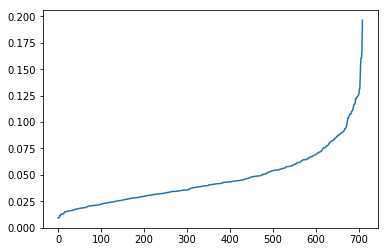

In [51]:
neigh = NearestNeighbors(n_neighbors=8)
#neigh = NearestNeighbors(radius=1)

nbrs = neigh.fit(df_cluster1)
distances, indices = nbrs.kneighbors(df_cluster1)

distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

Option 1 (for trying out): Lets consider eps range 0.05 to 0.2 and _min_sample_ range 5 to 15 and iterate over these combinations and get the best silhouette score.

In [52]:
min_samples = range(5,15)
eps = np.arange(0.07,0.2, 0.01) # returns array of ranging from 0.05 to 0.13 with step of 0.01

output = []

for ms in min_samples:
    for ep in eps:
        labels = DBSCAN(min_samples=ms, eps = ep).fit(df_cluster1).labels_
        score = silhouette_score(df_cluster1, labels)
        output.append((ms, ep, score))

min_samples, eps, score = sorted(output, key=lambda x:x[-1])[-1]
print(f"Best silhouette_score: {score}")
print(f"min_samples: {min_samples}")
print(f"eps: {eps}")

# Create DBSCAN object
dbscan = DBSCAN(eps, min_samples)

# Fit the data
dbscan.fit(df_cluster1)

# Obtain the labels
labels = dbscan.labels_

#print(labels)

### Number of clusters:
df1['clusters'] = labels
num_labels = len(np.unique(labels))
df1['clusters'].nunique()

# Merge only the 'db' column from df1 to sixth_compiled based on 'TRACTCE'
result_clustering = pd.merge(sixth_compiled, df1[['TRACTCE', 'clusters']], on='TRACTCE')
result_clustering

Best silhouette_score: 0.47431366701553296
min_samples: 13
eps: 0.15999999999999998


,STATEFP,COUNTYFP,TRACTCE,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry,...,aden_emp_452319,State_Code,County_Code,num_supermarkets_norm,num_fast_food_norm,num_coffee_shops_norm,poverty_rate_norm,food_env_score,food_index,clusters
0,36,047,057800,1400000US36047057800,36047057800,578,CT,172233,0,"POLYGON ((-73.95398 40.60140, -73.95304 40.601...",...,15.03770,36,047,0.411765,0.1250,0.142857,0.308571,0.496954,0.404382,0
1,36,047,037000,1400000US36047037000,36047037000,370,CT,336242,0,"POLYGON ((-73.96615 40.58667, -73.96564 40.588...",...,0.00000,36,047,0.117647,0.0000,0.000000,0.222857,0.358824,0.291966,0
2,36,047,019900,1400000US36047019900,36047019900,199,CT,188914,0,"POLYGON ((-73.96949 40.68629, -73.96749 40.686...",...,0.00000,36,047,0.352941,0.1875,0.000000,0.177143,0.420221,0.367078,0
3,36,047,040000,1400000US36047040000,36047040000,400,CT,192000,0,"POLYGON ((-73.98078 40.59845, -73.97986 40.598...",...,0.00000,36,047,0.176471,0.1250,0.000000,0.191429,0.350735,0.293307,0
4,36,047,098200,1400000US36047098200,36047098200,982,CT,345646,0,"POLYGON ((-73.89794 40.65051, -73.89586 40.651...",...,0.00000,36,047,0.117647,0.1875,0.000000,0.668571,0.302574,0.102002,0
5,36,047,082000,1400000US36047082000,36047082000,820,CT,148600,0,"POLYGON ((-73.95305 40.65608, -73.95016 40.656...",...,0.00000,36,047,0.529412,0.4375,0.000000,0.382857,0.433456,0.318599,0
6,36,047,079801,1400000US36047079801,36047079801,798.01,CT,129680,0,"POLYGON ((-73.96077 40.66173, -73.95704 40.661...",...,0.00000,36,047,0.294118,0.1875,0.142857,0.125714,0.419380,0.381666,0
7,36,047,019800,1400000US36047019800,36047019800,198,CT,134715,0,"POLYGON ((-74.00922 40.61858, -74.00743 40.620...",...,0.00000,36,047,0.352941,0.1875,0.285714,0.198571,0.477363,0.417792,0
8,36,047,036900,1400000US36047036900,36047036900,369,CT,226736,0,"POLYGON ((-73.91166 40.68245, -73.91151 40.683...",...,0.00000,36,047,0.647059,0.5000,0.142857,0.445714,0.502101,0.368387,0
9,36,047,052900,1400000US36047052900,36047052900,529,CT,174907,0,"POLYGON ((-73.95815 40.70804, -73.95790 40.708...",...,0.00000,36,047,0.470588,0.0000,0.000000,0.612857,0.535294,0.351437,0


Option 2 (we already know the parameters):

In [61]:
df1.head()

,TRACTCE,PPUBAS16_20,PFAMINCLT40K16_20,PED1_16_20,food_index,clusters
0,057800,0.276615,0.244986,0.174771,0.404382,0
2,037000,0.178423,0.298548,0.166946,0.291966,0
3,019900,0.049125,0.105898,0.047463,0.367078,0
4,040000,0.223124,0.249673,0.237144,0.293307,0
5,098200,0.475323,0.680469,0.313112,0.102002,0


In [62]:
# Create DBSCAN object
eps = 0.13
min_samples = 14
dbscan = DBSCAN(eps, min_samples)

# Fit the data
dbscan.fit(df_cluster1)

# Obtain the labels
labels = dbscan.labels_

#print(labels)

### Number of clusters:
df1['clusters'] = labels
num_labels = len(np.unique(labels))
df1['clusters'].nunique()

# Merge only the 'db' column from df1 to sixth_compiled based on 'TRACTCE'
result_clustering = pd.merge(sixth_compiled, df1[['TRACTCE', 'clusters']], on='TRACTCE')
result_clustering

,STATEFP,COUNTYFP,TRACTCE,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry,...,aden_emp_452319,State_Code,County_Code,num_supermarkets_norm,num_fast_food_norm,num_coffee_shops_norm,poverty_rate_norm,food_env_score,food_index,clusters
0,36,047,057800,1400000US36047057800,36047057800,578,CT,172233,0,"POLYGON ((-73.95398 40.60140, -73.95304 40.601...",...,15.03770,36,047,0.411765,0.1250,0.142857,0.308571,0.496954,0.404382,0
1,36,047,037000,1400000US36047037000,36047037000,370,CT,336242,0,"POLYGON ((-73.96615 40.58667, -73.96564 40.588...",...,0.00000,36,047,0.117647,0.0000,0.000000,0.222857,0.358824,0.291966,0
2,36,047,019900,1400000US36047019900,36047019900,199,CT,188914,0,"POLYGON ((-73.96949 40.68629, -73.96749 40.686...",...,0.00000,36,047,0.352941,0.1875,0.000000,0.177143,0.420221,0.367078,0
3,36,047,040000,1400000US36047040000,36047040000,400,CT,192000,0,"POLYGON ((-73.98078 40.59845, -73.97986 40.598...",...,0.00000,36,047,0.176471,0.1250,0.000000,0.191429,0.350735,0.293307,0
4,36,047,098200,1400000US36047098200,36047098200,982,CT,345646,0,"POLYGON ((-73.89794 40.65051, -73.89586 40.651...",...,0.00000,36,047,0.117647,0.1875,0.000000,0.668571,0.302574,0.102002,-1
5,36,047,082000,1400000US36047082000,36047082000,820,CT,148600,0,"POLYGON ((-73.95305 40.65608, -73.95016 40.656...",...,0.00000,36,047,0.529412,0.4375,0.000000,0.382857,0.433456,0.318599,0
6,36,047,079801,1400000US36047079801,36047079801,798.01,CT,129680,0,"POLYGON ((-73.96077 40.66173, -73.95704 40.661...",...,0.00000,36,047,0.294118,0.1875,0.142857,0.125714,0.419380,0.381666,0
7,36,047,019800,1400000US36047019800,36047019800,198,CT,134715,0,"POLYGON ((-74.00922 40.61858, -74.00743 40.620...",...,0.00000,36,047,0.352941,0.1875,0.285714,0.198571,0.477363,0.417792,0
8,36,047,036900,1400000US36047036900,36047036900,369,CT,226736,0,"POLYGON ((-73.91166 40.68245, -73.91151 40.683...",...,0.00000,36,047,0.647059,0.5000,0.142857,0.445714,0.502101,0.368387,0
9,36,047,052900,1400000US36047052900,36047052900,529,CT,174907,0,"POLYGON ((-73.95815 40.70804, -73.95790 40.708...",...,0.00000,36,047,0.470588,0.0000,0.000000,0.612857,0.535294,0.351437,-1


##### Map the clusters

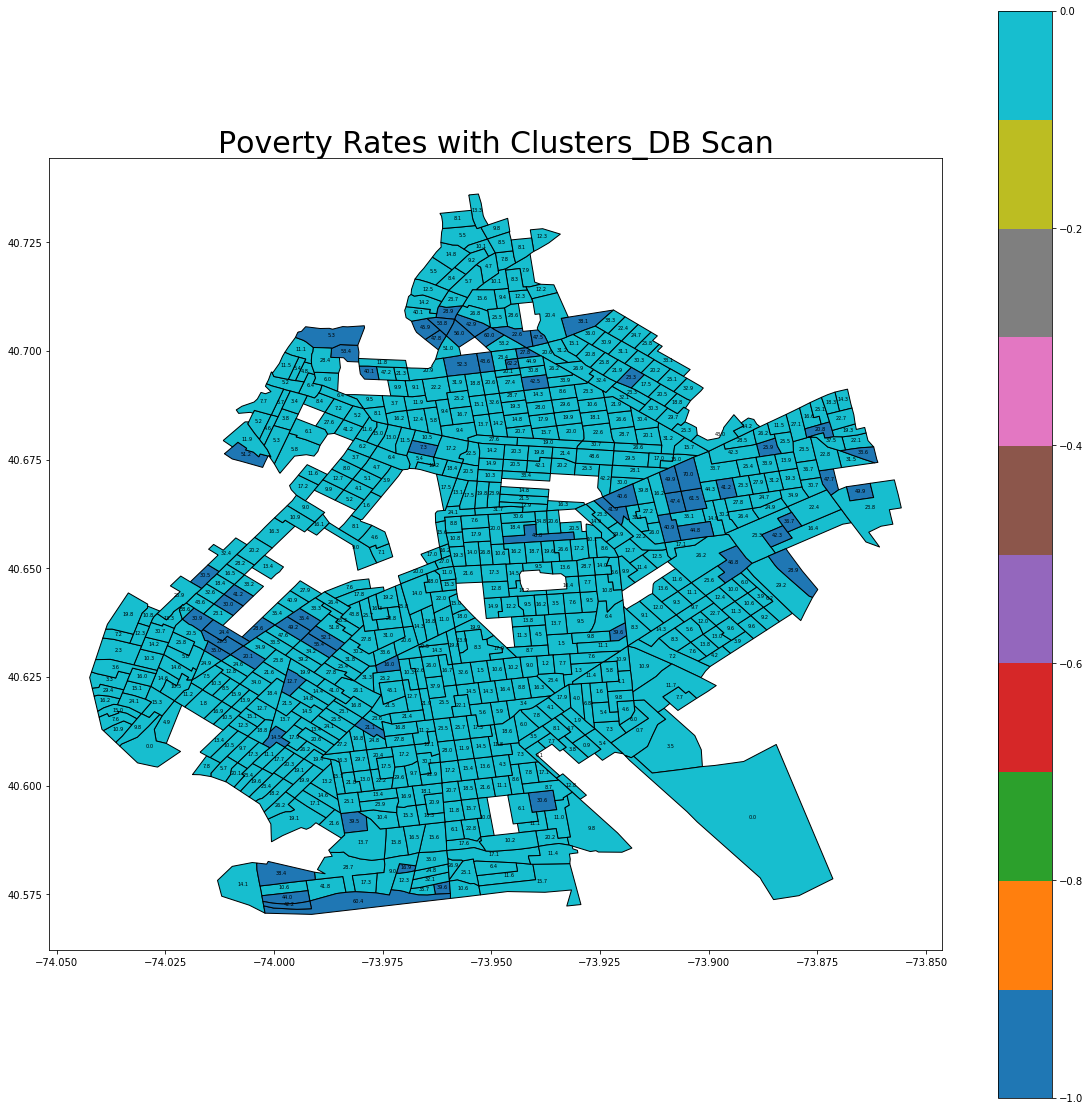

In [63]:
merged = GeoDataFrame(result_clustering)

# Assuming 'result' is a GeoDataFrame
fig, ax = plt.subplots(figsize=(20,20))
merged.plot(ax=ax, column='clusters', cmap='tab10', legend=True, edgecolor='black')
ax.set_title('Poverty Rates with Clusters_DB Scan', fontsize=30)

for idx, row in merged.iterrows():
    if row['geometry'] is not None and row['geometry'].is_valid:
        ax.annotate(s=row['PovertyRate'], xy=row['geometry'].centroid.coords[0], ha='center', fontsize=5)

# Show the plot
plt.show()

### Generate csv file

In [66]:
clust_file = df1[['TRACTCE', 'clusters']]

In [68]:
clust_file.head()

,TRACTCE,clusters
0,057800,0
2,037000,0
3,019900,0
4,040000,0
5,098200,-1


In [71]:
clust_file.to_csv(os.path.join(project_dir, 'Info reports\\food_clusters_Brooklyn.csv'),index=False)

### Gaussian Mixture Models

In [587]:
# Fit GMM for a range of cluster numbers and calculate silhouette score
range_n_clusters = range(2, 11)
silhouette_scores = []

for n_clusters in range_n_clusters:
    gmm = GaussianMixture(n_components=n_clusters)
    gmm.fit(df_cluster1)
    cluster_labels = gmm.predict(df_cluster1)
    silhouette_avg = silhouette_score(df_cluster1, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    print(f"Number of clusters: {n_clusters}, Silhouette Score: {silhouette_avg}")

# Select the optimal number of clusters based on silhouette score
optimal_n_clusters = range_n_clusters[np.argmax(silhouette_scores)]
print(f'Optimal number of clusters: {optimal_n_clusters}')

# Step 6: Fit GMM with the optimal number of clusters
gmm_optimal = GaussianMixture(n_components=optimal_n_clusters)
gmm_optimal.fit(df_cluster1)
labels = gmm_optimal.predict(df_cluster1)



Number of clusters: 2, Silhouette Score: 0.23721810737398935
Number of clusters: 3, Silhouette Score: 0.17774229066735903
Number of clusters: 4, Silhouette Score: 0.16752906819841332
Number of clusters: 5, Silhouette Score: 0.15357887732295633
Number of clusters: 6, Silhouette Score: 0.1510681131267746
Number of clusters: 7, Silhouette Score: 0.11487908126464837
Number of clusters: 8, Silhouette Score: 0.09615016951787747
Number of clusters: 9, Silhouette Score: 0.05310157613123699
Number of clusters: 10, Silhouette Score: 0.056902876929801956
Optimal number of clusters: 2


In [588]:
print(labels)

[0 1 1 0 0 1 1 0 0 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 1
 0 0 0 1 1 1 1 1 1 0 0 0 1 1 0 0 0 0 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 0
 0 0 0 1 0 1 0 1 0 0 0 0 1 1 0 1 1 0 1 0 0 0 1 1 1 0 1 1 1 1 1 1 0 0 0 1 0
 0 0 0 1 1 0 0 1 1 0 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 1 0 1 0 0 0 0 1 0 0 0 1
 1 1 0 0 1 1 1 0 1 1 1 1 1 1 0 1 0 1 0 0 1 1 1 1 0 1 0 0 0 1 1 1 0 1 1 1 0
 1 0 0 0 0 0 1 1 0 1 1 1 1 1 1 0 1 0 0 1 1 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 1
 1 1 1 0 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 0 1 0 1 1 1 0 0 0 1 0 0 1 1 1 0 1 1
 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 1 1 1 1 0 1 1 1 1 0 0 0 0 1 1 1 0 1 1 1
 0 0 1 0 1 1 1 0 1 1 1 0 1 1 1 1 0 0 0 0 1 1 1 1 0 0 1 1 1 0 1 1 1 1 1 0 0
 0 0 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 0 0 1 1 1 1 1 0 0 1 0 1 1 1 1 0 0 0 1 0
 1 1 0 1 0 1 1 0 0 1 1 0 1 1 0 0 0 0 0 1 1 1 1 0 0 0 1 1 0 0 1 1 1 1 1 1 1
 1 0 1 1 0 0 1 0 0 1 1 0 1 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 1 0 1 1 1 0 1 1
 1 1 0 0 1 1 0 1 0 1 1 0 0 1 1 0 0 0 0 1 1 0 1 1 1 0 0 1 1 1 0 0 1 0 0 1 1
 1 1 1 0 0 1 0 1 0 0 0 0 

In [589]:
df1['clusters'] = labels
# Merge only the 'db' column from df1 to sixth_compiled based on 'TRACTCE'
result_clustering = pd.merge(sixth_compiled, df1[['TRACTCE', 'clusters']], on='TRACTCE')
result_clustering

,STATEFP,COUNTYFP,TRACTCE,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry,...,State_Code,County_Code,num_supermarkets_norm,num_fast_food_norm,num_coffee_shops_norm,poverty_rate_norm,food_env_score,food_index,clusters,db
0,36,047,057800,1400000US36047057800,36047057800,578,CT,172233,0,"POLYGON ((-73.95398 40.60140, -73.95304 40.601...",...,36,047,0.411765,0.1250,0.142857,0.308571,0.496954,0.404382,0.0,0
1,36,047,037000,1400000US36047037000,36047037000,370,CT,336242,0,"POLYGON ((-73.96615 40.58667, -73.96564 40.588...",...,36,047,0.117647,0.0000,0.000000,0.222857,0.358824,0.291966,0.0,1
2,36,047,019900,1400000US36047019900,36047019900,199,CT,188914,0,"POLYGON ((-73.96949 40.68629, -73.96749 40.686...",...,36,047,0.352941,0.1875,0.000000,0.177143,0.420221,0.367078,2.0,1
3,36,047,040000,1400000US36047040000,36047040000,400,CT,192000,0,"POLYGON ((-73.98078 40.59845, -73.97986 40.598...",...,36,047,0.176471,0.1250,0.000000,0.191429,0.350735,0.293307,0.0,0
4,36,047,098200,1400000US36047098200,36047098200,982,CT,345646,0,"POLYGON ((-73.89794 40.65051, -73.89586 40.651...",...,36,047,0.117647,0.1875,0.000000,0.668571,0.302574,0.102002,1.0,0
5,36,047,082000,1400000US36047082000,36047082000,820,CT,148600,0,"POLYGON ((-73.95305 40.65608, -73.95016 40.656...",...,36,047,0.529412,0.4375,0.000000,0.382857,0.433456,0.318599,1.0,1
6,36,047,079801,1400000US36047079801,36047079801,798.01,CT,129680,0,"POLYGON ((-73.96077 40.66173, -73.95704 40.661...",...,36,047,0.294118,0.1875,0.142857,0.125714,0.419380,0.381666,1.0,1
7,36,047,019800,1400000US36047019800,36047019800,198,CT,134715,0,"POLYGON ((-74.00922 40.61858, -74.00743 40.620...",...,36,047,0.352941,0.1875,0.285714,0.198571,0.477363,0.417792,2.0,0
8,36,047,036900,1400000US36047036900,36047036900,369,CT,226736,0,"POLYGON ((-73.91166 40.68245, -73.91151 40.683...",...,36,047,0.647059,0.5000,0.142857,0.445714,0.502101,0.368387,0.0,0
9,36,047,052900,1400000US36047052900,36047052900,529,CT,174907,0,"POLYGON ((-73.95815 40.70804, -73.95790 40.708...",...,36,047,0.470588,0.0000,0.000000,0.612857,0.535294,0.351437,0.0,0


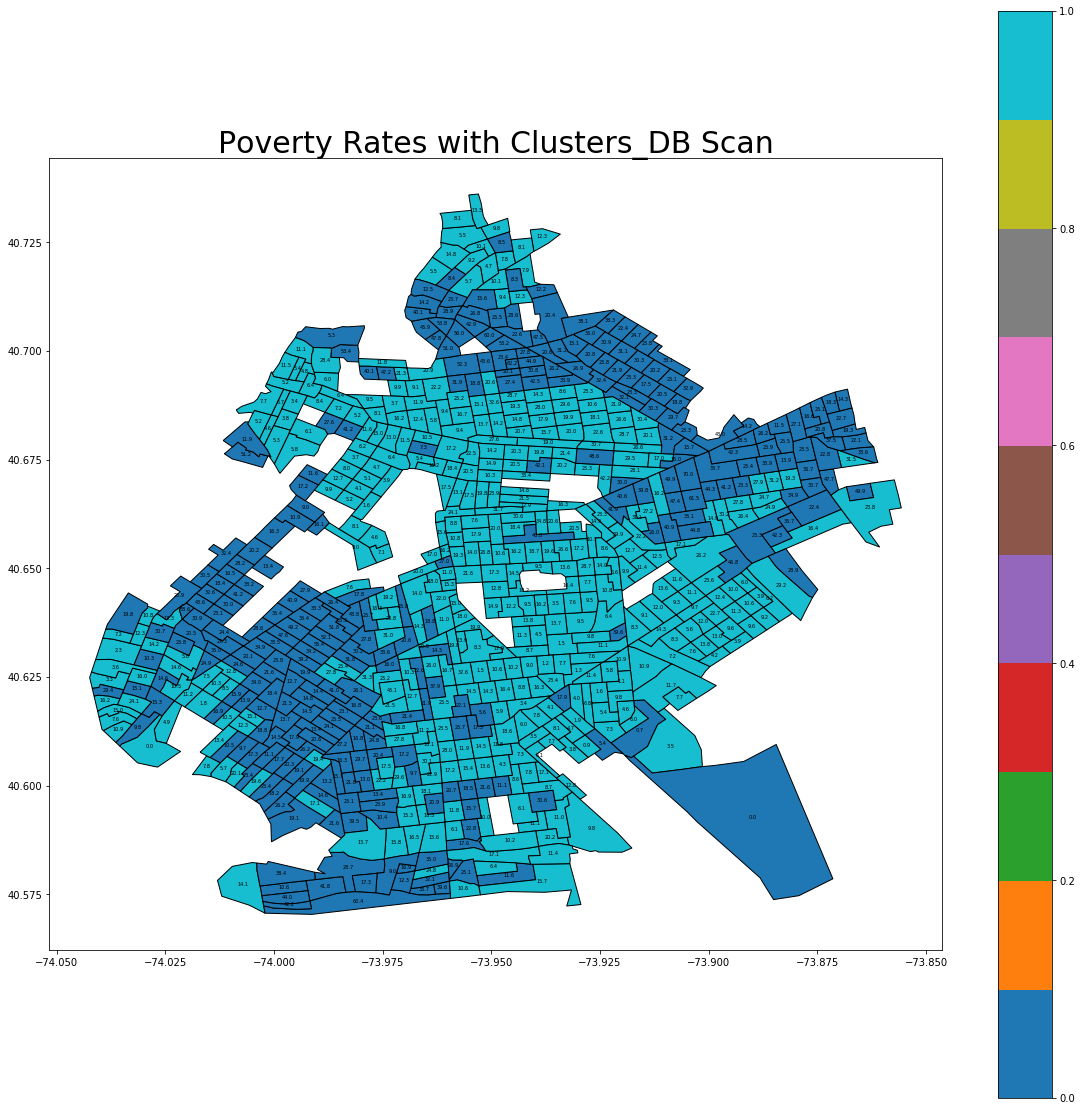

In [590]:
merged = GeoDataFrame(result_clustering)

# Assuming 'result' is a GeoDataFrame
fig, ax = plt.subplots(figsize=(20,20))
merged.plot(ax=ax, column='clusters', cmap='tab10', legend=True, edgecolor='black')
ax.set_title('Poverty Rates with Clusters_DB Scan', fontsize=30)

for idx, row in merged.iterrows():
    if row['geometry'] is not None and row['geometry'].is_valid:
        ax.annotate(s=row['PovertyRate'], xy=row['geometry'].centroid.coords[0], ha='center', fontsize=5)

# Show the plot
plt.show()